In [1]:
##공공데이터 이용 (지하철)
##데이터 병합 처리 연습 (여러개의 엑셀파일)
import pandas as pd

In [3]:
file = './rawfiles/CARD_SUBWAY_MONTH_201901.csv'
raw = pd.read_csv(file)  #안읽히면 encoding = 'cp949'하면 대부분 해결 디폴트는 utf-8
raw.head()
#read_excel(' ~~~~.xlsx')
##자주 사용하는 옵션
#index_col = 몇번째 컬럼까지 사용할지
#header = row의 경우 몇번째 로부터 읽을지
#thousands = ',' 천단위 기호. ,사용

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,경춘선,1323,가평,1520,1436,20190104
1,20190101,경춘선,1322,상천,275,114,20190104
2,20190101,경춘선,1321,청평,1509,1083,20190104
3,20190101,경춘선,1320,대성리,357,271,20190104
4,20190101,경춘선,1319,마석,1772,1963,20190104


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18334 entries, 0 to 18333
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    18334 non-null  int64 
 1   노선명     18334 non-null  object
 2   역ID     18334 non-null  int64 
 3   역명      18334 non-null  object
 4   승차총승객수  18334 non-null  int64 
 5   하차총승객수  18334 non-null  int64 
 6   등록일자    18334 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1002.8+ KB


In [12]:
raw = pd.DataFrame()
#빈 프레임 만들고
file1 = './rawfiles/CARD_SUBWAY_MONTH_201901.csv'
file2 = './rawfiles/CARD_SUBWAY_MONTH_201902.csv'
temp = pd.read_csv(file1)
raw = raw.append(temp)
temp = pd.read_csv(file2)
raw = raw.append(temp)
raw

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,경춘선,1323,가평,1520,1436,20190104
1,20190101,경춘선,1322,상천,275,114,20190104
2,20190101,경춘선,1321,청평,1509,1083,20190104
3,20190101,경춘선,1320,대성리,357,271,20190104
4,20190101,경춘선,1319,마석,1772,1963,20190104
...,...,...,...,...,...,...,...
16538,20190228,우이신설선,4709,북한산보국문,6564,6029,20190303
16539,20190228,우이신설선,4710,정릉,4821,4348,20190303
16540,20190228,경춘선,1314,퇴계원,4212,3899,20190303
16541,20190228,우이신설선,4711,성신여대입구(돈암),4058,4452,20190303


In [13]:
#폴더나 파일을 관리하는 라이브러리 os!!
#윈도우 탐색기 같은 기능
import os

In [14]:
#os.listdir() 을 이용하면 rawfiles 폴더에 있는 파일 리스트를 살펴볼 수 있음
os.listdir()
#현재 경로가 아닌 특정 경로의 파일을 보고싶으면  ()에 주소를 넣으면 됨

['.ipynb_checkpoints',
 '.Rhistory',
 'asaur_0.50',
 'data',
 'deep-learning-with-python-notebooks-master',
 'desktop.ini',
 'League of Legends',
 'My Music',
 'My Pictures',
 'My Videos',
 'Notes',
 'Python Scripts',
 'python_basic_pj.ipynb',
 'R',
 'rawfiles',
 'ssaemtable',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Zoom',
 '마이너리티 리포트.docx',
 '사용자 지정 Office 서식 파일',
 '생존mid.docx',
 '수영 14주차 수업 내용.docx',
 '카카오톡 받은 파일']

In [22]:
dirpath = './rawfiles/'
files = os.listdir(dirpath)
files
##리스트형태로 저장됨
##이렇게 쓰면 노가다 하지 않아도 됨

['CARD_SUBWAY_MONTH_201901.csv',
 'CARD_SUBWAY_MONTH_201902.csv',
 'CARD_SUBWAY_MONTH_201903.csv',
 'CARD_SUBWAY_MONTH_201904.csv',
 'CARD_SUBWAY_MONTH_201905.csv',
 'CARD_SUBWAY_MONTH_201906.csv']

In [27]:
#파일 병합하기
#빈 데이터 프레임 준비 -> 반복문 -> os파일 읽기 ->데이터 프레임에 추가하기
raw = pd.DataFrame()

for file in files:
    #print(file) 잘 작동하는지 확인
    #temp = pd.read_csv(file) 이렇게 쓰면 에러가나는데 경로가 없기 때문
    #print(dirpath + file)
    temp = pd.read_csv(dirpath + file)
#    raw.append(temp)
#print(raw) 여기서 실행하면 아무것도 없는데 왜? 저장이 안되기때문
    raw = raw.append(temp)
    #append(temp, ignore_index = True)라고 하면 인덱스 무시하고 병합가능
raw.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,경춘선,1323,가평,1520,1436,20190104
1,20190101,경춘선,1322,상천,275,114,20190104
2,20190101,경춘선,1321,청평,1509,1083,20190104
3,20190101,경춘선,1320,대성리,357,271,20190104
4,20190101,경춘선,1319,마석,1772,1963,20190104


In [29]:
raw.tail()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
17719,20190630,2호선,204,을지로4가,4940,4668,20190703
17720,20190630,2호선,203,을지로3가,12043,11854,20190703
17721,20190630,2호선,202,을지로입구,31622,29723,20190703
17722,20190630,2호선,201,시청,10178,8214,20190703
17723,20190630,1호선,159,동묘앞,13859,14352,20190703


In [30]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99342 entries, 0 to 17723
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   노선명     99342 non-null  object
 2   역ID     99342 non-null  int64 
 3   역명      99342 non-null  object
 4   승차총승객수  99342 non-null  int64 
 5   하차총승객수  99342 non-null  int64 
 6   등록일자    99342 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 6.1+ MB


In [33]:
##위에 살펴보면 맨 마지막 인덱스가 17000대인데 전체 데이터는 99342이지 
##이 말은 데이터를 새로 append할 때 index가 초기화 되면서 다시 카운팅 됐다는 거잖아
## index를 초기화 시켜줄 필요가 있겠지
raw = raw.reset_index(drop = True)  # 그냥 쓰면 기존 index가 컬럼으로 밀려 올라와
raw.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,경춘선,1323,가평,1520,1436,20190104
1,20190101,경춘선,1322,상천,275,114,20190104
2,20190101,경춘선,1321,청평,1509,1083,20190104
3,20190101,경춘선,1320,대성리,357,271,20190104
4,20190101,경춘선,1319,마석,1772,1963,20190104


In [ ]:
#함수 명령어 살펴보기 shift + tap
#요일 데이터를 추가할 수 있을까?!!!!

In [34]:
# 일자를 관리하는 datetime 라이브러리를 불러오겠습니다.
from datetime import datetime

##datetime.strptime('날짜str', str형태) : 문자 -> 날짜타입
##str 형태란 %Y(4자리) - %m(2자리) - %d(2자리) %H시간:%M분 :%S초
##대소문자 잘 구분해야겠지? M 이 분이고 m이 월이잖아

In [40]:
s = '20190630'
date = datetime.strptime(s, '%Y%m%d')
##뒤에 0,0은 시, 분
date

datetime.datetime(2019, 6, 30, 0, 0)

In [42]:
#월 ~일 : 0~6
#날짜 타입에서 요일을 알아내기 위해 weekday()사용!
weekday_dict = ['월', '화', '수', '목', '금', '토', '일']
weekday_index = date.weekday()
print(weekday_index)
print(weekday_dict[weekday_index])

6
일


In [44]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   노선명     99342 non-null  object
 2   역ID     99342 non-null  int64 
 3   역명      99342 non-null  object
 4   승차총승객수  99342 non-null  int64 
 5   하차총승객수  99342 non-null  int64 
 6   등록일자    99342 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 5.3+ MB


In [49]:
weekday_dict = ['월', '화', '수', '목', '금', '토', '일']
weekday_list = []
for date_str in raw['사용일자']:
    date = datetime.strptime(str(date_str), "%Y%m%d")
    #date_str의 변수가 int형이라 에러가 뜸 클래스를 str로 바꿔줘야함
    weekday_index = date.weekday()
    weekday = weekday_dict[weekday_index]
    
    weekday_list.append(weekday)
    

In [51]:
raw['요일'] = weekday_list
raw.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,요일
0,20190101,경춘선,1323,가평,1520,1436,20190104,화
1,20190101,경춘선,1322,상천,275,114,20190104,화
2,20190101,경춘선,1321,청평,1509,1083,20190104,화
3,20190101,경춘선,1320,대성리,357,271,20190104,화
4,20190101,경춘선,1319,마석,1772,1963,20190104,화


In [52]:
raw.tail()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,요일
99337,20190630,2호선,204,을지로4가,4940,4668,20190703,일
99338,20190630,2호선,203,을지로3가,12043,11854,20190703,일
99339,20190630,2호선,202,을지로입구,31622,29723,20190703,일
99340,20190630,2호선,201,시청,10178,8214,20190703,일
99341,20190630,1호선,159,동묘앞,13859,14352,20190703,일


In [53]:
##중간에 있는데이터 보고싶다?
raw.sample(10)

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,요일
58062,20190420,4호선,419,한성대입구(삼선교),14879,14454,20190423,토
51755,20190408,7호선,2755,춘의,11106,11038,20190411,월
20972,20190205,9호선,4102,김포공항,6827,8113,20190208,화
58749,20190421,경부선,1724,평택,13902,15351,20190424,일
54706,20190413,9호선,4125,신논현,32163,33081,20190416,토
75558,20190520,6호선,2619,디지털미디어시티,15779,17120,20190523,월
36391,20190311,8호선,2825,신흥,4995,5438,20190314,월
91233,20190617,수인선,1881,인천논현,6943,7278,20190620,월
20591,20190204,2호선,201,시청,5569,4144,20190207,월
64110,20190501,2호선,248,양천구청,6244,6434,20190504,수


In [60]:
#요일 컬럼을 사용일자 컬럼 옆으로 옮기고 싶다
raw.columns
raw = raw[['사용일자', '요일', '노선명', '역ID', '역명', '승차총승객수', '하차총승객수', '등록일자']]

In [62]:
##정리한 데이터 저장
fpath = './data/subway_raw.xlsx'
raw.to_excel(fpath, index = False)

In [ ]:
##언제 승객수가 가장 많을 까??

In [63]:
import pandas as pd
fpath = './data/subway_raw.xlsx'
raw = pd.read_excel(fpath)
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,화,경춘선,1323,가평,1520,1436,20190104
1,20190101,화,경춘선,1322,상천,275,114,20190104
2,20190101,화,경춘선,1321,청평,1509,1083,20190104
3,20190101,화,경춘선,1320,대성리,357,271,20190104
4,20190101,화,경춘선,1319,마석,1772,1963,20190104


In [64]:
raw.info()
#데이터 갯수 비어있는 데이터 갯수 데이터 형태 전반적인 구조를 알아보는 것을 습관들일 것

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   요일      99342 non-null  object
 2   노선명     99342 non-null  object
 3   역ID     99342 non-null  int64 
 4   역명      99342 non-null  object
 5   승차총승객수  99342 non-null  int64 
 6   하차총승객수  99342 non-null  int64 
 7   등록일자    99342 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


In [66]:
##데이터 정리
data_date =raw.pivot_table(index = ['사용일자', '요일'],
               values = '승차총승객수',
               aggfunc = 'sum')
data_date.head()

,,승차총승객수
사용일자,요일,
20190101,화,3419948
20190102,수,7621668
20190103,목,7873692
20190104,금,8270345
20190105,토,6062294


In [69]:
data_date.sort_values(by = '승차총승객수', ascending = False) #코드 까먹었으면 괄호 사이에서 쉬프트 + 탭 ,그 상태에서 crtl +f 해도 알려줌


,,승차총승객수
사용일자,요일,
20190503,금,9229899
20190510,금,9164243
20190524,금,9068976
20190517,금,9058227
20190412,금,9012472
...,...,...
20190206,수,3741895
20190101,화,3419948
20190203,일,3412440


In [ ]:
##  ?? 5월에 승객수가 많나? 왜 5월 금요일에 제일 많지?
## 금요일에 승객수가 많나?

In [71]:
##5월이 특별이 많은지 알고싶으면 월별로 분류된 컬럼이 필요하겠지
yearmonth_list = []
monthday_list = []
for date in raw['사용일자']:
    yearmonth = str(date)[:6]
    ##int가 아니라서 에러나옴
    yearmonth_list.append(yearmonth)
    monthday = str(date)[4:]
    monthday_list.append(monthday)
    

In [72]:
raw['연월'] = yearmonth_list
raw['월일'] = monthday_list
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,연월,월일
0,20190101,화,경춘선,1323,가평,1520,1436,20190104,201901,0101
1,20190101,화,경춘선,1322,상천,275,114,20190104,201901,0101
2,20190101,화,경춘선,1321,청평,1509,1083,20190104,201901,0101
3,20190101,화,경춘선,1320,대성리,357,271,20190104,201901,0101
4,20190101,화,경춘선,1319,마석,1772,1963,20190104,201901,0101


In [74]:
##pandas에서 피벗테이블을 만들어줘라는 새로운 방식 해볼꼐
##데이터 지정해줘야함
##pd.pivot_table(data= raw, index = [],)
date_month = raw.pivot_table(index = '연월', 
                values = '승차총승객수',
                aggfunc = 'sum').sort_values(by = '승차총승객수', ascending =False)
date_month
###가정 1 트루

,승차총승객수
연월,
201905,236267004
201901,221848014
201906,221547039
201904,218832085
201902,190335812
201903,157782643


In [77]:
##요일별 승객 수 살펴보자
##data의 요일 순서대로 표시해줌
data_week = pd.pivot_table(data= raw,
              index = '요일',
              values = '승차총승객수',
              aggfunc = 'sum')

data_week = data_week.sort_values(by = '승차총승객수', ascending = False)
data_week

,승차총승객수
요일,
금,214064383
화,198116552
목,197522587
월,187921393
수,176959733
토,157401217
일,114626732


In [80]:
##월별 편차가 어떻게 다를까
yearmonth = '201901'
cond = raw['연월'] == yearmonth
df_selected = raw[cond]

In [84]:
df_pivot = df_selected.pivot_table(index = ['월일', '요일'],
                       values = '승차총승객수',
                       aggfunc = 'sum')
##인덱스 제거해줄것
df_pivot = df_pivot.reset_index()
df_pivot.head()

,월일,요일,승차총승객수
0,0101,화,3419948
1,0102,수,7621668
2,0103,목,7873692
3,0104,금,8270345
4,0105,토,6062294


In [85]:
##시계열 그래프로 그려볼게
##어케 지정하느냐
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
import platform
import seaborn as sns

##이미지 한글 표시 설정
if platform.system() == 'windows': #윈도우의 경우 맑은고딕
        font_name = font_manager.FontProperties(fname = "c:/Windows/Fonsts/malgun.ttf").get_name()
        rc('font', family = 'font_name')
else:   #Mac일 경우 애플고딕
    rc('font', family = 'AppleGothic')

##그래프에서 -가 표시되도록 하는 설정
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

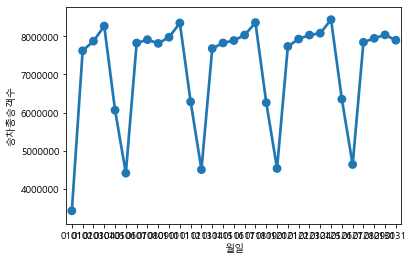

In [86]:
##일자별 승객수
sns.pointplot( data = df_pivot, x = '월일', y = '승차총승객수')
##좀 가로로 길게 할 필요가 있겠지

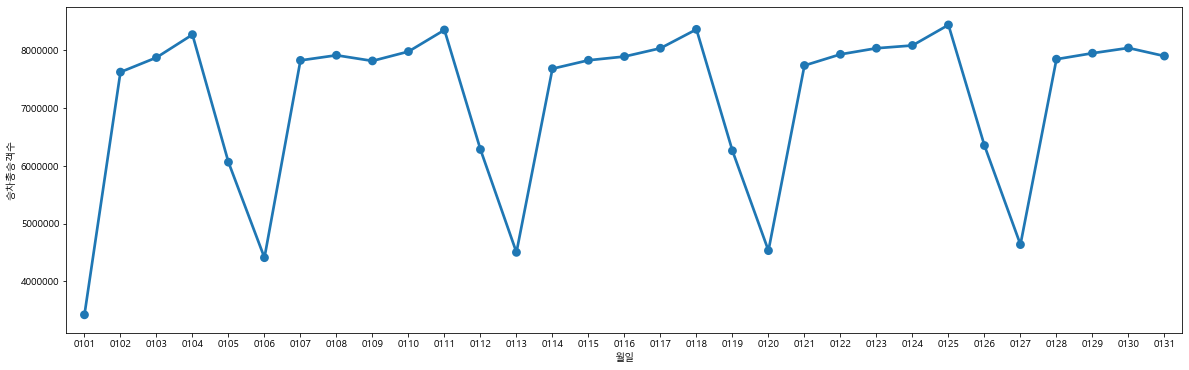

In [87]:
fig, ax = plt.subplots( figsize = (20, 6))
sns.pointplot( data = df_pivot, x = '월일', y = '승차총승객수')

In [88]:
##월별 일자 그래프 
raw['연월'].unique()

array(['201901', '201902', '201903', '201904', '201905', '201906'],
      dtype=object)

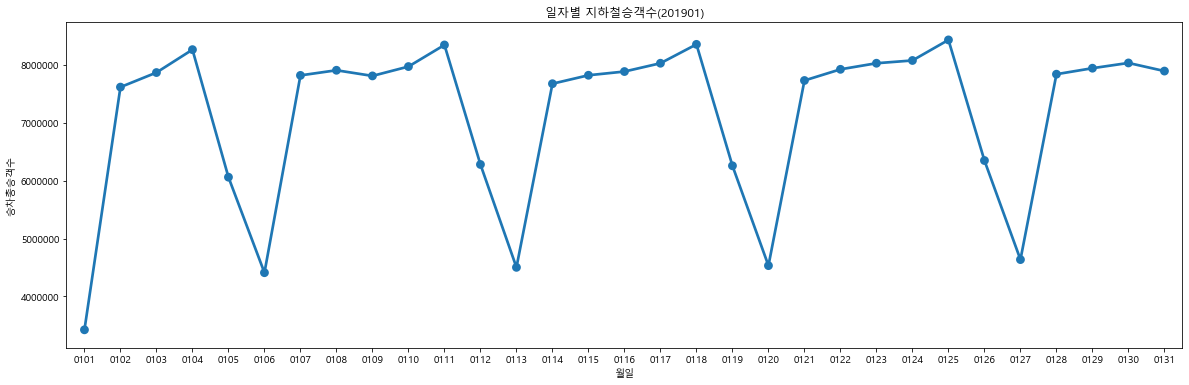

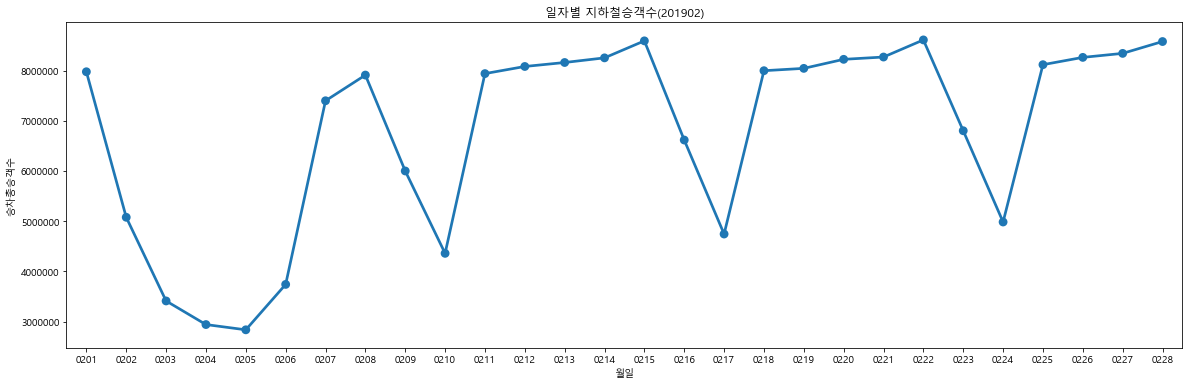

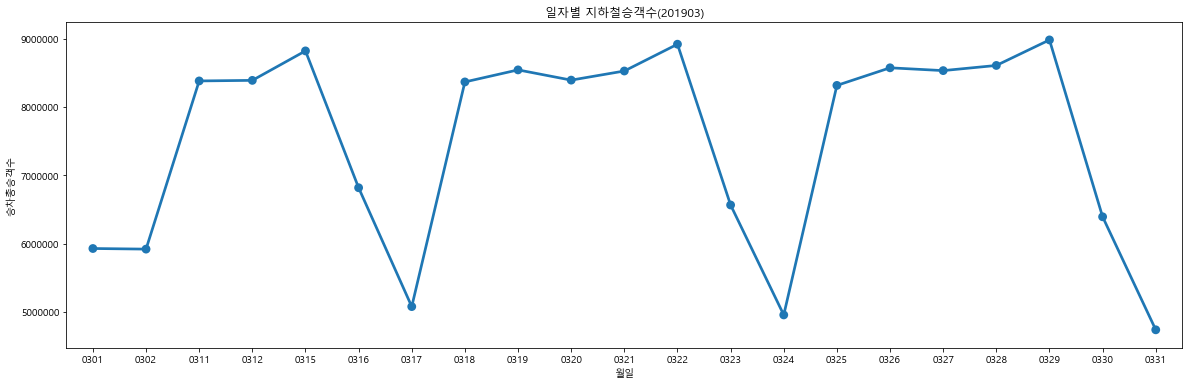

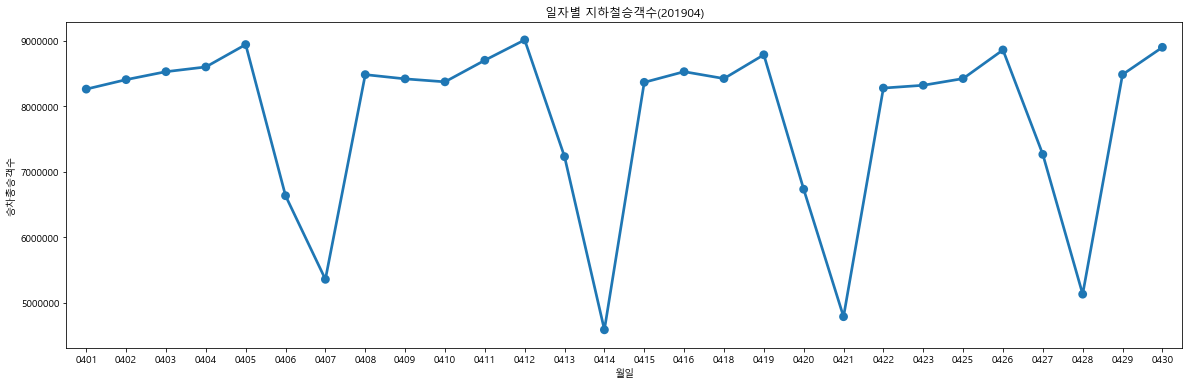

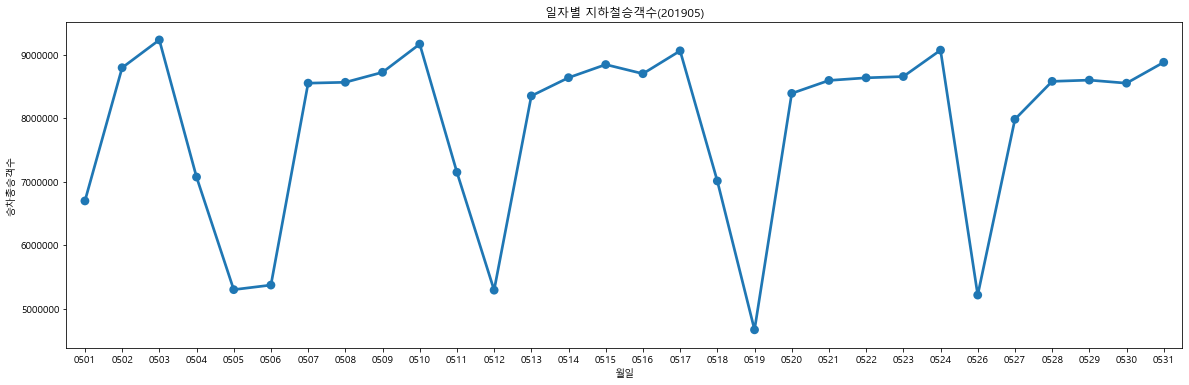

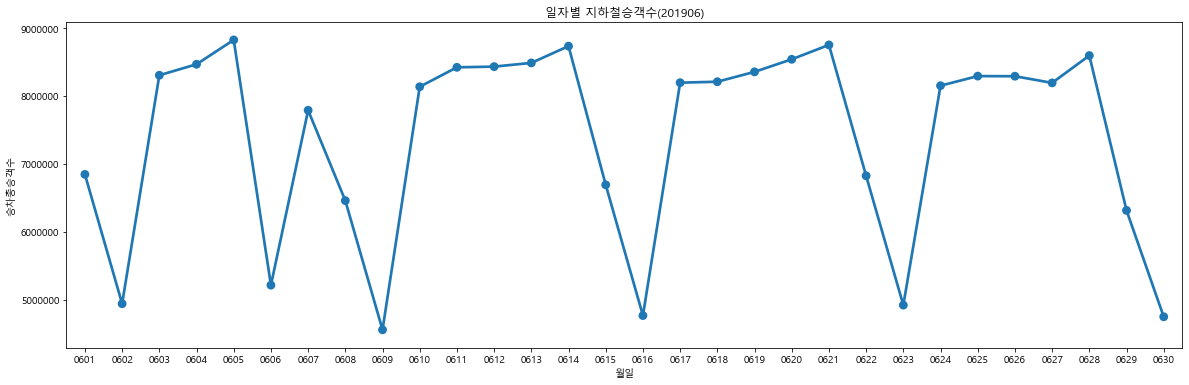

In [91]:
for yearmonth in raw['연월'].unique():
    
    cond = raw['연월'] == yearmonth
    df_selected = raw[cond]    
    
    df_pivot = df_selected.pivot_table(index = ['월일', '요일'],
                           values = '승차총승객수',
                           aggfunc = 'sum')
    ##인덱스 제거해줄것
    df_pivot = df_pivot.reset_index()    
    
    fig, ax = plt.subplots( figsize = (20, 6))
    #타이틀 붙이기
    #포매팅도 이용
    ax.set_title(f'일자별 지하철승객수({yearmonth})')
    sns.pointplot( data = df_pivot, x = '월일', y = '승차총승객수')
    
    
    

In [92]:
##어느역에서 지하철을 가장 많이 탈까
raw = pd.read_excel(fpath)

In [93]:
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,화,경춘선,1323,가평,1520,1436,20190104
1,20190101,화,경춘선,1322,상천,275,114,20190104
2,20190101,화,경춘선,1321,청평,1509,1083,20190104
3,20190101,화,경춘선,1320,대성리,357,271,20190104
4,20190101,화,경춘선,1319,마석,1772,1963,20190104


In [94]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   요일      99342 non-null  object
 2   노선명     99342 non-null  object
 3   역ID     99342 non-null  int64 
 4   역명      99342 non-null  object
 5   승차총승객수  99342 non-null  int64 
 6   하차총승객수  99342 non-null  int64 
 7   등록일자    99342 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


In [97]:
##가장 많이 승객이 타는 역은??
data_station = raw.pivot_table(index = '역명', 
               values = '승차총승객수',
               aggfunc = 'sum')
data_station = data_station.sort_values(by = '승차총승객수', ascending =False)
data_station.head(10)

,승차총승객수
역명,
잠실(송파구청),17273668
강남,16833240
고속터미널,16295461
홍대입구,16018193
서울역,15952147
사당,12304165
신림,11881525
선릉,10725980
구로디지털단지,10577842


In [98]:
raw['노선명'].unique()

array(['경춘선', '경인선', '경의선', '경원선', '경부선', '2호선', '경강선', '수인선', '분당선',
       '9호선2~3단계', '9호선', '8호선', '7호선', '6호선', '공항철도 1호선', '5호선', '4호선',
       '3호선', '1호선', '중앙선', '안산선', '우이신설선', '일산선', '장항선', '과천선'],
      dtype=object)

In [105]:
##노선별로 역별/요일별 승객수 비교
line = '1호선'
data_line = raw[ raw['노선명'] == line]
data_line
##역 id를 보면 순서대로 진행되더라
df_pivot = data_line.pivot_table( index =  ['역ID','역명'],
                    columns = '요일',
                     values = '승차총승객수',
                     aggfunc = 'sum')
##월화수목금토일 순서대로 보고싶어
df_pivot = df_pivot[['월', '화', '수', '목', '금', '토', '일']]
##숫자가 크니까 1만 단위로 표시하고싶어
df_pivot = df_pivot/10000
df_pivot

,요일,월,화,수,목,금,토,일
역ID,역명,,,,,,,
150,서울역,139.3534,145.0435,129.4993,146.4058,171.3426,130.5254,98.2663
151,시청,64.0200,71.3864,62.8091,70.3511,76.2319,50.9676,29.8211
152,종각,112.1870,119.7708,108.1454,120.9061,132.2916,86.4711,52.9500
153,종로3가,83.8255,87.3786,80.0413,89.9436,97.7886,88.0772,53.8763
154,종로5가,68.4973,72.1713,63.9769,72.8118,78.3878,68.7458,33.1649
155,동대문,35.6532,37.3526,32.9555,36.5131,40.0480,39.2698,32.3882
156,신설동,41.5996,43.1354,38.6989,43.0631,46.7609,32.3935,24.1796
157,제기동,52.3596,53.7898,47.5634,53.5471,56.2030,49.6330,32.9532
158,청량리(서울시립대입구),63.5328,66.3575,58.9248,65.9927,70.9061,63.2366,46.9806


In [106]:
#시각화 해보자
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
import platform
import seaborn as sns

##이미지 한글 표시 설정
if platform.system() == 'windows': #윈도우의 경우 맑은고딕
        font_name = font_manager.FontProperties(fname = "c:/Windows/Fonsts/malgun.ttf").get_name()
        rc('font', family = 'font_name')
else:   #Mac일 경우 애플고딕
    rc('font', family = 'AppleGothic')

##그래프에서 -가 표시되도록 하는 설정
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [111]:
line

'1호선'

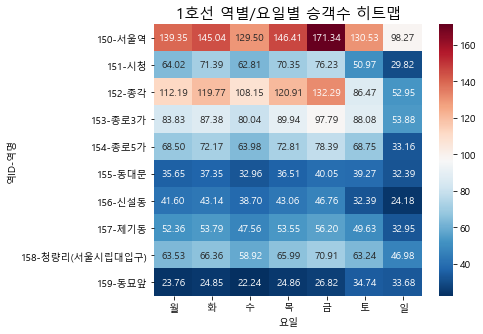

In [112]:
fig, ax = plt.subplots( figsize = (6,5))
plt.title(f'{line} 역별/요일별 승객수 히트맵', fontsize = 15)
sns.heatmap(df_pivot, 
           cmap = 'RdBu_r',
           annot= True, fmt = '.2f')

In [115]:
##1~9호선 노선리스트 정리
raw['노선명'].unique()
line_seoul_list = []
for line in raw['노선명'].unique():
    ##마지막 두자리가 '호선'인것만 추리고 싶다
    ##if line[-2:] == '호선': 
    ##만약 여기서 공항철도는 빼고싶다 
    if line[1:] == '호선':
        line_seoul_list.append(line)
line_seoul_list

['2호선', '9호선', '8호선', '7호선', '6호선', '5호선', '4호선', '3호선', '1호선']

In [118]:
len(df_pivot)
#행의 개수가 표시됨

10

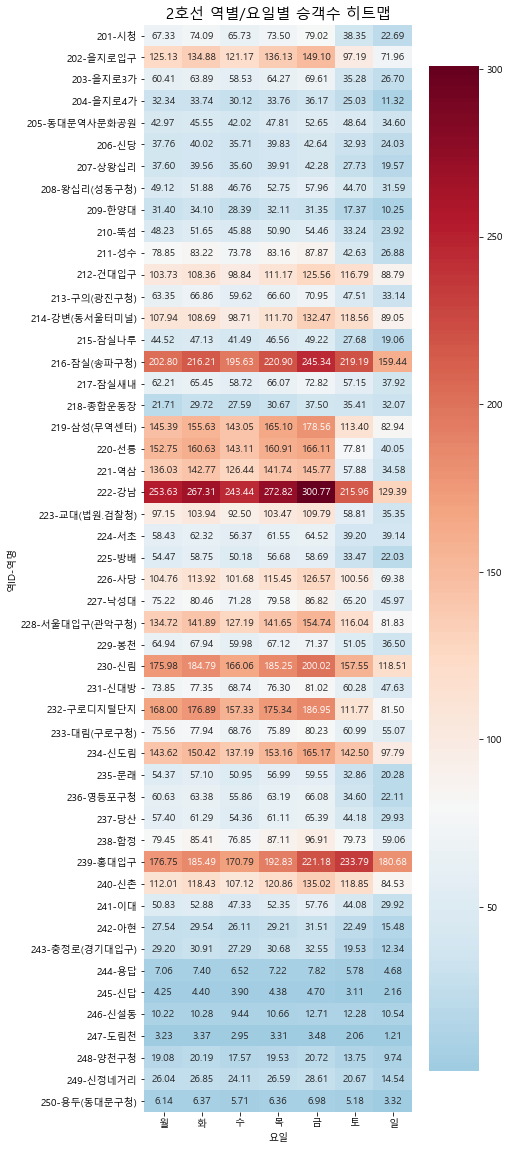

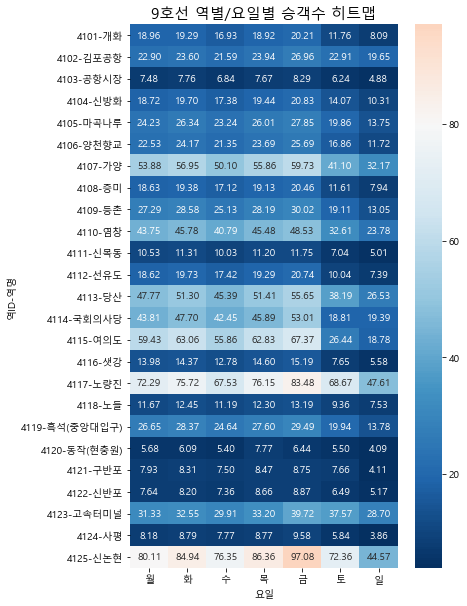

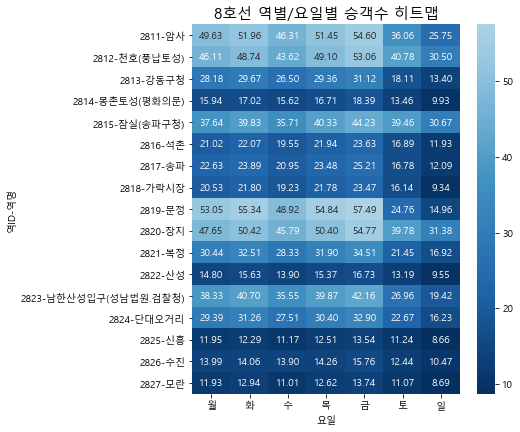

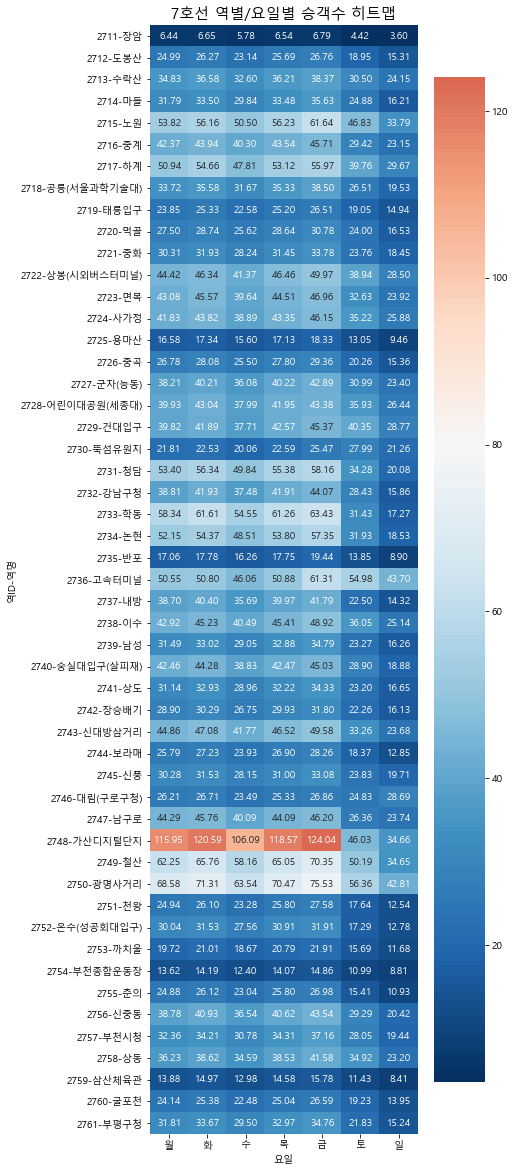

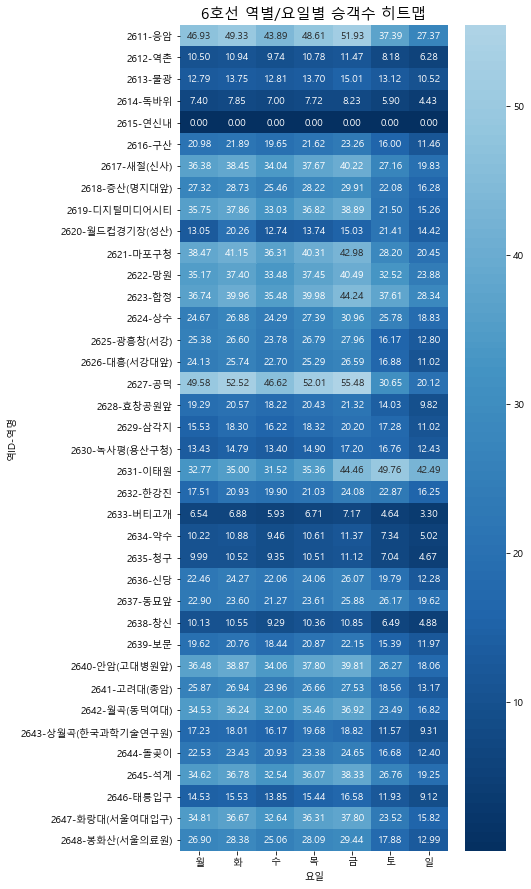

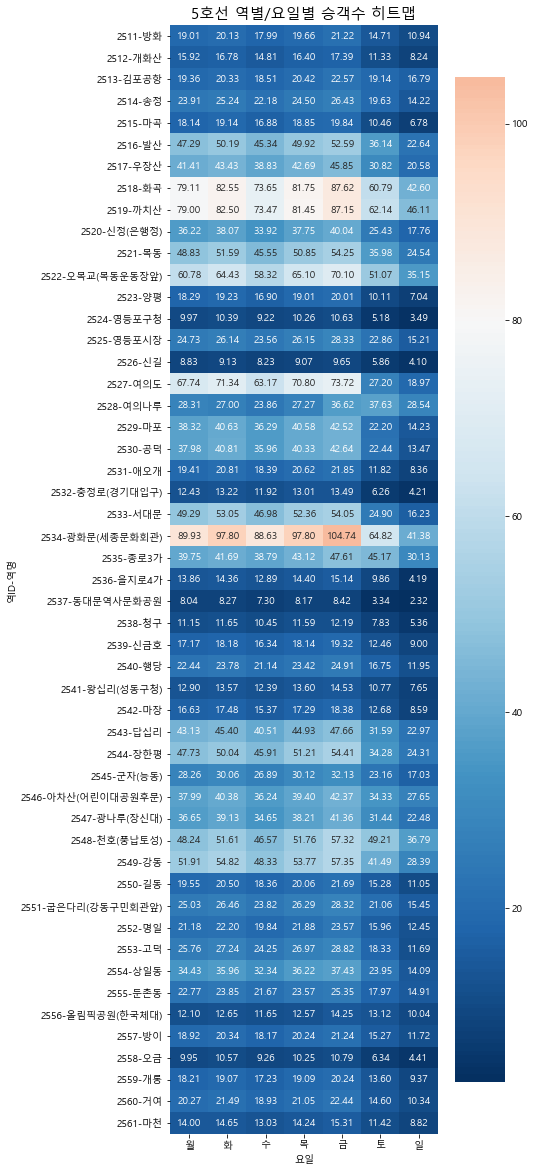

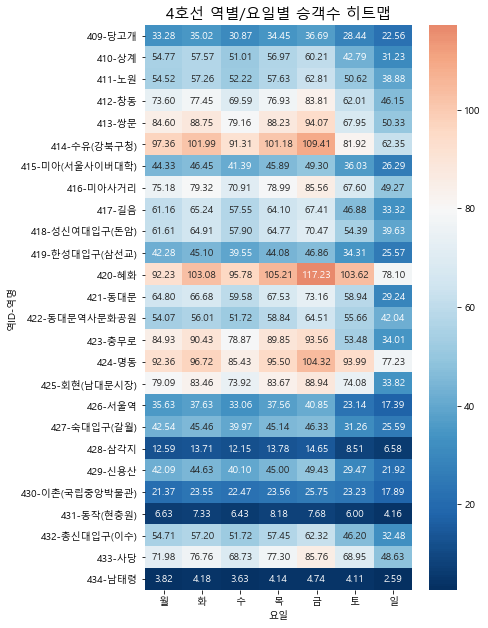

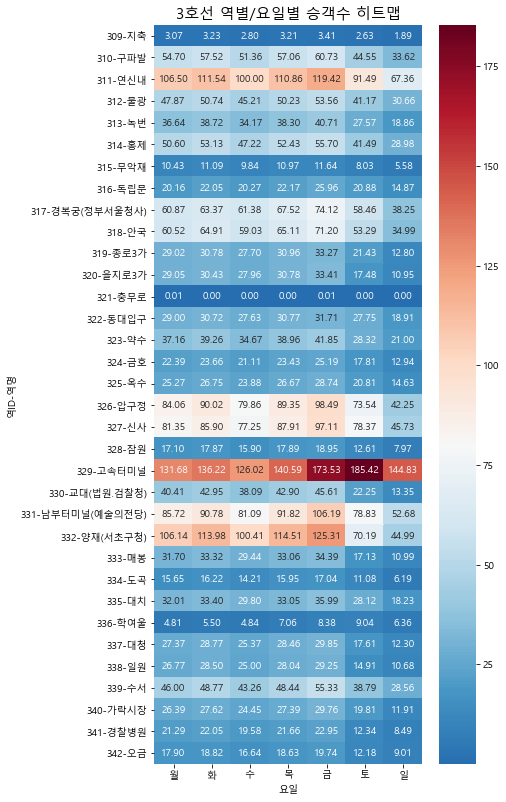

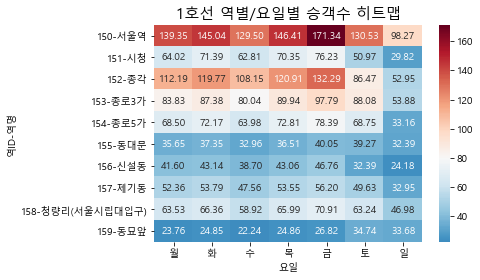

In [121]:
for line in line_seoul_list:
    data_line = raw[ raw['노선명'] == line]
    data_line
    ##역 id를 보면 순서대로 진행되더라
    df_pivot = data_line.pivot_table( index =  ['역ID','역명'],
                        columns = '요일',
                         values = '승차총승객수',
                         aggfunc = 'sum')
    ##월화수목금토일 순서대로 보고싶어
    df_pivot = df_pivot[['월', '화', '수', '목', '금', '토', '일']]
    ##숫자가 크니까 1만 단위로 표시하고싶어
    df_pivot = df_pivot/10000

    #세로 길이가 들쭉 날쭉이라 역이 많은 호선은 보기 불편해 그거를 figsize에 연동하자
    fig, ax = plt.subplots( figsize = (6,len(df_pivot)/2.5))
    plt.title(f'{line} 역별/요일별 승객수 히트맵', fontsize = 15)
    sns.heatmap(df_pivot, 
               cmap = 'RdBu_r',
                center = 80,
               annot= True, fmt = '.2f')